[[ 8.59244532  7.37702717  8.67660475  8.41942166  8.77516339  6.78075914
   7.22680137  7.93438603  7.67331113  7.44464931  7.61014827  9.35194358
   9.66961956  9.05366969  8.50023231  8.69056769 10.63500649 10.64925287
  10.19120477  9.05329749  8.69672909  8.46523116  9.6211208   9.43269922
  10.29345278 10.27404974]
 [ 7.46971069  7.37224573  8.24286194  8.50269006  9.2659066   7.04461532
   7.09998578  7.70753052  6.27812326  6.51223925  7.99847526  9.47814439
   9.98804667  9.07580529  8.54943128  9.05692681 10.55313379 10.7245059
  10.19124388  9.20236755  9.07689283  8.84870365  9.49416813  9.92469512
  10.4364616  10.50744178]]


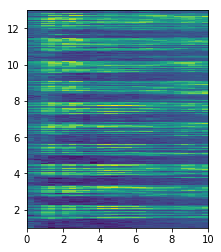

In [14]:
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

(rate,sig) = wav.read("OSR_us_000_0010_8k.wav")
mfcc_feat = mfcc(sig,rate)
d_mfcc_feat = delta(mfcc_feat, 2)
fbank_feat = logfbank(sig,rate)

print(fbank_feat[1:3,:])

#plt.plot(fbank_feat)
plt.imshow(fbank_feat, extent=[0,10,1,13])
plt.show()

In [8]:
import scipy.io.wavfile as wav
import numpy as np
import speechpy
import os

#file_name = os.path.join(os.path.dirname(os.path.abspath(__file__)),'Alesis-Sanctuary-QCard-AcoustcBas-C2.wav')
fs, signal = wav.read('OSR_us_000_0010_8k.wav')
print(signal)
#signal = signal[:,0]

# Example of pre-emphasizing.
signal_preemphasized = speechpy.processing.preemphasis(signal, cof=0.98)

# Example of staching frames
frames = speechpy.processing.stack_frames(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01, filter=lambda x: np.ones((x,)),
         zero_padding=True)

# Example of extracting power spectrum
power_spectrum = speechpy.processing.power_spectrum(frames, fft_points=512)
print('power spectrum shape=', power_spectrum.shape)

############# Extract MFCC features #############
mfcc = speechpy.feature.mfcc(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
             num_filters=40, fft_length=512, low_frequency=0, high_frequency=None)
mfcc_cmvn = speechpy.processing.cmvnw(mfcc,win_size=301,variance_normalization=True)
print('mfcc(mean + variance normalized) feature shape=', mfcc_cmvn.shape)

mfcc_feature_cube = speechpy.feature.extract_derivative_feature(mfcc)
print('mfcc feature cube shape=', mfcc_feature_cube.shape)

############# Extract logenergy features #############
logenergy = speechpy.feature.lmfe(signal, sampling_frequency=fs, frame_length=0.020, frame_stride=0.01,
             num_filters=40, fft_length=512, low_frequency=0, high_frequency=None)
logenergy_feature_cube = speechpy.feature.extract_derivative_feature(logenergy)
print('logenergy features=', logenergy.shape)

[ -919 -1314 -1049 ...  -330  -320  -300]
3361 268985 160 80.0
power spectrum shape= (3361, 257)
mfcc(mean + variance normalized) feature shape= (3360, 13)
mfcc feature cube shape= (3360, 13, 3)
logenergy features= (3360, 40)


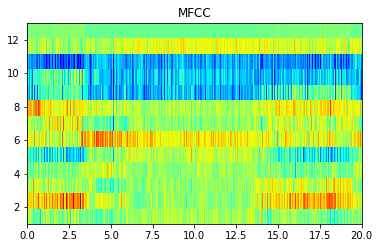

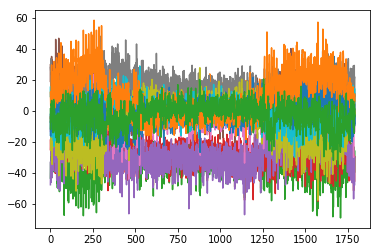

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

(rate,sig) = wav.read("CrownedEagle.wav")
mfcc_feat = mfcc(sig,rate)

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
#cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.jet, origin='lower', aspect='auto')
cax = ax.imshow(mfcc_data, cmap=cm.jet, extent=[0,20,1,13])
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()